In [64]:
#THêm thư viện
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [61]:
#Kết nối đến drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


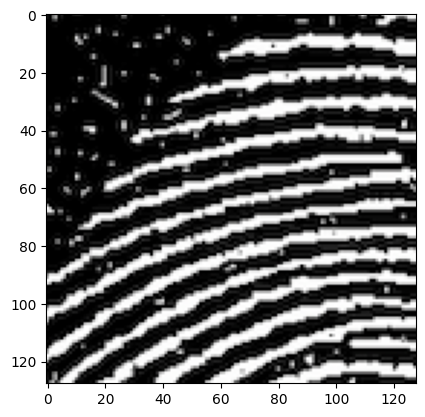

In [62]:
#Hiển thị hình ảnh
anhGoc = plt.imread('/content/drive/MyDrive/XuLyAnh/TH1/TH1/fingerprint.png')
plt.imshow(anhGoc)

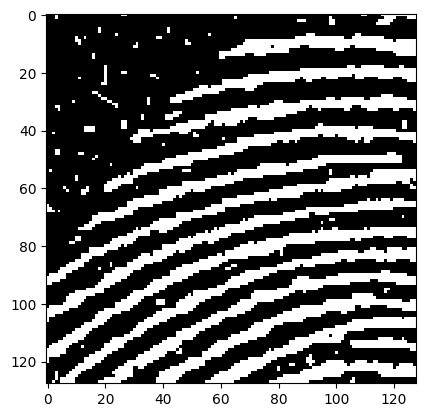

In [5]:
#Chuyển ảnh gốc sang ảnh nhị phân
anhNhiPhan = (anhGoc[:,:,0]>= 0.5) *1 #Nếu giá trị của mỗi pixel >=0.5 thì chuyển sang 1. NGược lại pixel đó nhận giá trị là 0
plt.imshow(anhNhiPhan, interpolation = 'nearest', cmap = 'gray') #interpalation được sử dụng để xác định phương pháp nội suy để hiển thị hình ảnh
plt.show()

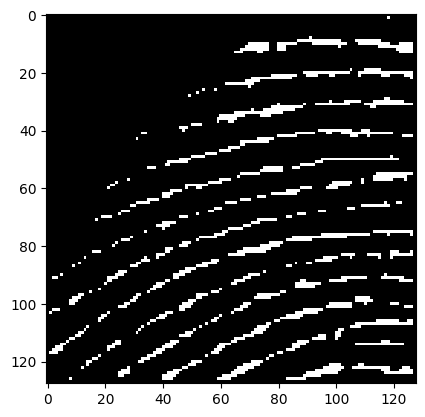

In [118]:
#1.Thực hiện phép ăn mòn
def an_mon(img, ptct):
  w, h = img.shape

  #Tính tổng phần tử cấu trúc
  sumPTCT = np.sum(ptct)
  leTP = (ptct.shape[0] - 1)//2
  leTD = (ptct.shape[1] - 1)//2

  img_kq = np.zeros_like(img)
  for i in range(leTD, w - leTD):
    for j in range(leTP, h - leTP):
      catAnhGoc = img[i - leTD: i+leTP+1, j-leTP:j+leTP+1]
      if catAnhGoc.shape[0] == 2:
        print(i,j,catAnhGoc.shape)
        return img
      else:
        #so sanhs
        kq1 = np.sum(catAnhGoc*ptct)
        if(kq1 >= sumPTCT):
          img_kq[i,j] = 1
  return img_kq


ptct = np.array([[1,1,1],[1,1,1],[1,1,1]])

plt.imshow(an_mon(anhNhiPhan, ptct), interpolation='nearest', cmap = 'gray')
plt.show()

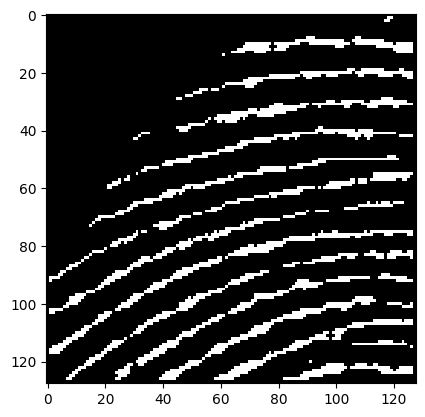

In [112]:
plt.imshow(an_mon(anhNhiPhan, ptctB), interpolation='nearest', cmap = 'gray')
plt.show()

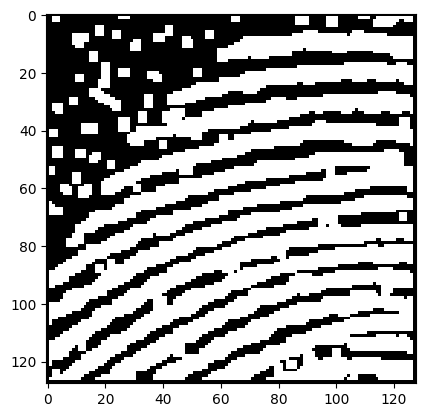

In [86]:
#2.Thực hiện phép giãn nở
def gian_no(img, ptct):
  w, h = img.shape

  #Tính tổng phần tử cấu trúc
  sumPTCT = np.sum(ptct)
  leTP = (ptct.shape[0] - 1)//2
  leTD = (ptct.shape[1] - 1)//2

  img_kq = np.zeros_like(img)
  for i in range(leTD, h - leTD):
    for j in range(leTP, h - leTP):
      catAnhGoc = img[i - leTD: i+leTP+1, j-leTP:j+leTP+1]

      if np.any(catAnhGoc * ptct):
        img_kq[i,j] = 1
  return img_kq


ptct = np.array([[1,1,1],[1,1,1],[1,1,1]])
plt.imshow(gian_no(anhNhiPhan, ptct), interpolation='nearest', cmap = 'gray')
plt.show()


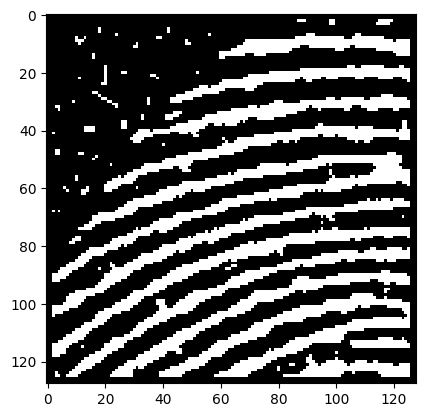

In [99]:
#Bài tập 1
#--- Phép đóng
#>Giãn nở trước
ptctB = np.array([[0,1,0],[1,1,1],[0,1,0]])
phepdong1 = gian_no(anhNhiPhan,ptctB)
#> Ăn mòn sau
phepdong2 = an_mon(phepdong1,ptctB)

plt.imshow(phepdong2, interpolation='nearest', cmap = 'gray')
plt.show()

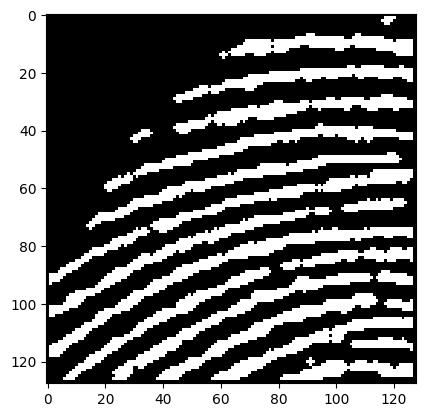

In [88]:
#--- Phép toán mở
#>Ăn trước
phepmo1 = an_mon(anhNhiPhan,ptctB)
#>Giản nở sau
phepmo2 = gian_no(phepmo1, ptctB)

plt.imshow(phepmo2, interpolation='nearest', cmap = 'gray')
plt.show()

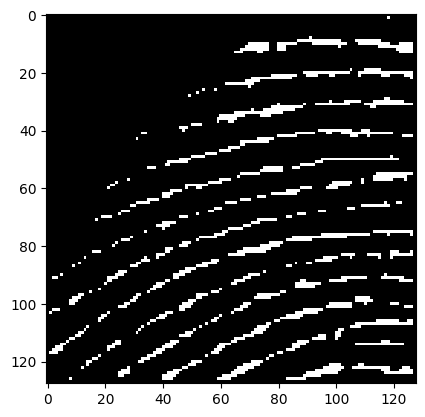

In [97]:
#3.Phép hit or miss
def HMT(img, ptct):
  w, h = img.shape
  img_out = np.zeros_like(img)
  ptct0 = (ptct == 0) * 1
  sum0 = np.sum(ptct0)
  ptct1 = (ptct == 1) * 1
  sum1 = np.sum(ptct1)

  for i in range(1, h - 1):
    for j in range(1, w - 1):
      catHinhGoc = img[i - 1:i + 2, j - 1:j + 2]
      X = catHinhGoc * ptct1
      OK1 = 1
      if np.sum(X) != sum1:
        OK1 = 0

      X = (1 - catHinhGoc) * ptct0
      OK0 = 1
      if np.sum(X) != sum0:
        OK0 = 0

      img_out[i, j] = OK1 * OK0
  return img_out

plt.imshow(HMT(anhNhiPhan, ptct), interpolation='nearest', cmap = 'gray')
plt.show()



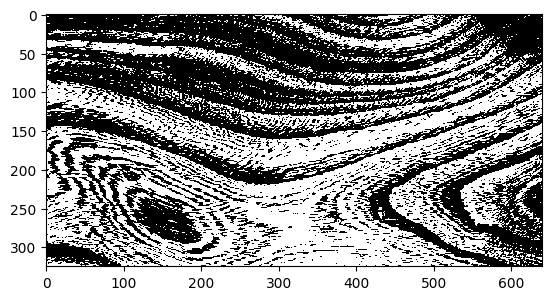

In [77]:
#đọc ảnh mới

AnhVanGo = plt.imread('/content/drive/MyDrive/XuLyAnh/TH1/TH1/van-go-dep.jpg')

#Chuyển đổi sang ảnh mức xám
anhmucxam = cv2.cvtColor(AnhVanGo, cv2.COLOR_BGR2GRAY)
kqk =  anhmucxam.astype('float32')
kqk= (kqk >= 50)
#Chuyển đổi ảnh nhị phân
AnhNhiPhan = kqk.astype('uint8')
plt.imshow(AnhNhiPhan, interpolation='nearest' ,cmap='gray')

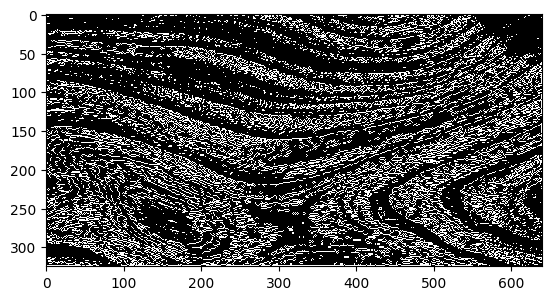

In [120]:
#Phép Boundary extraction

AnhGocDaBiAnMon = an_mon(AnhNhiPhan, ptctB)
AnhKQ1 = AnhNhiPhan - AnhGocDaBiAnMon
plt.imshow(AnhKQ1, interpolation='nearest', cmap='gray')
plt.show()